In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

pd.set_option('display.max_columns', None)  # –û—Ç–æ–±—Ä–∞–∂–∞—Ç—å –≤—Å–µ –∫–æ–ª–æ–Ω–∫–∏
# pd.set_option('display.max_rows', None)  

## –ê–∫—Ü–∏–∏ / –û–±–ª–∏–≥–∞—Ü–∏–∏ (investing.com)

In [3]:
gold_path = '–ü—Ä–æ—à–ª—ã–µ –¥–∞–Ω–Ω—ã–µ - –§—å—é—á–µ—Ä—Å –Ω–∞ –∑–æ–ª–æ—Ç–æ.csv'
brent_path = '–ü—Ä–æ—à–ª—ã–µ –¥–∞–Ω–Ω—ã–µ - –§—å—é—á–µ—Ä—Å –Ω–∞ –Ω–µ—Ñ—Ç—å Brent.csv'
svoe_path = '–ü—Ä–æ—à–ª—ã–µ –¥–∞–Ω–Ω—ã–µ - CBOE Volatility Index.csv'
gazp_path = '–ü—Ä–æ—à–ª—ã–µ –¥–∞–Ω–Ω—ã–µ - GAZP.csv' 
lkoh_path = '–ü—Ä–æ—à–ª—ã–µ –¥–∞–Ω–Ω—ã–µ - LKOH.csv'
plzl_path = '–ü—Ä–æ—à–ª—ã–µ –¥–∞–Ω–Ω—ã–µ - PLZL.csv'
sp500_path = '–ü—Ä–æ—à–ª—ã–µ –¥–∞–Ω–Ω—ã–µ - S&P 500.csv'
sber_path = '–ü—Ä–æ—à–ª—ã–µ –¥–∞–Ω–Ω—ã–µ - SBER.csv'
sngs_path = '–ü—Ä–æ—à–ª—ã–µ –¥–∞–Ω–Ω—ã–µ - SNGS.csv'
tath_path = '–ü—Ä–æ—à–ª—ã–µ –¥–∞–Ω–Ω—ã–µ - TATN.csv'
ydex_path = '–ü—Ä–æ—à–ª—ã–µ –¥–∞–Ω–Ω—ã–µ - YDEX.csv'
bond3_path = '–ü—Ä–æ—à–ª—ã–µ –¥–∞–Ω–Ω—ã–µ –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–∏ –æ–±–ª–∏–≥–∞—Ü–∏–π –†–æ—Å—Å–∏—è 3-–ª–µ—Ç–Ω–∏–µ.csv'
bond5_path = '–ü—Ä–æ—à–ª—ã–µ –¥–∞–Ω–Ω—ã–µ –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–∏ –æ–±–ª–∏–≥–∞—Ü–∏–π –†–æ—Å—Å–∏—è 5-–ª–µ—Ç–Ω–∏–µ.csv'
bond1_path = '–ü—Ä–æ—à–ª—ã–µ –¥–∞–Ω–Ω—ã–µ –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–∏ –æ–±–ª–∏–≥–∞—Ü–∏–π –†–æ—Å—Å–∏—è –≥–æ–¥–æ–≤—ã–µ.csv'

In [4]:
def stock_bonds(file_path):
    df = pd.read_csv(file_path)
    
    df['–î–∞—Ç–∞'] = pd.to_datetime(df['–î–∞—Ç–∞'], format='%d.%m.%Y', dayfirst=True)

    if '–û–±—ä—ë–º' in df.columns and '–ò–∑–º. %' in df.columns:
        df.drop(['–û–±—ä—ë–º', '–ò–∑–º. %'], axis=1, inplace=True)
    elif '–ò–∑–º. %' in df.columns:
        df.drop(['–ò–∑–º. %'], axis=1, inplace=True)
        
    df.set_index('–î–∞—Ç–∞', inplace=True)
    
    return df

In [5]:
gold = stock_bonds(gold_path)
brent = stock_bonds(brent_path)
svoe = stock_bonds(svoe_path)
gazp = stock_bonds(gazp_path)
lkoh = stock_bonds(lkoh_path)
plzl = stock_bonds(plzl_path)
sp500 = stock_bonds(sp500_path)
sber = stock_bonds(sber_path)
sngs = stock_bonds(sngs_path)
tath = stock_bonds(tath_path)
ydex = stock_bonds(ydex_path)

bond3 = stock_bonds(bond3_path)
bond5 = stock_bonds(bond5_path)
bond1 = stock_bonds(bond1_path)

## –í–∞–ª—é—Ç–∞ –¶–ë

In [7]:
ruble_to_doll_path = '–î–æ–ª–ª–∞—Ä_—Ä—É–±–ª—å_–¶–ë.xlsx'
ruble_to_euro_path = '–ï–≤—Ä–æ_—Ä—É–±–ª—å_–¶–ë.xlsx'

In [8]:
def currency(file_path):
    df = pd.read_excel(file_path)
    
    df['–î–∞—Ç–∞'] = pd.to_datetime(df['data'], format='%Y.%m.%d')
    
    df.set_index('–î–∞—Ç–∞', inplace=True)

    df.drop(['cdx', 'data', 'nominal'], axis=1, inplace=True)
    
    return df

In [9]:
ruble_to_doll = currency(ruble_to_doll_path)
ruble_to_euro = currency(ruble_to_euro_path)

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## –ò–Ω—Ñ–ª—è—Ü–∏—è –∏ –∫–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞ –¶–ë

In [11]:
inflation_and_key_rate_path = '–ò–Ω—Ñ–ª—è—Ü–∏—è –∏ –∫–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞ –¶–ë.xlsx'

In [12]:
def inflation_and_key_rate_monthly_data(file_path):
    df = pd.read_excel(file_path, dtype={'–î–∞—Ç–∞': str})
    
    df['–î–∞—Ç–∞'] = df['–î–∞—Ç–∞'].astype(str)
    
    # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤ datetime, —É–∫–∞–∑—ã–≤–∞—è –ø–æ—Å–ª–µ–¥–Ω–∏–π –¥–µ–Ω—å –º–µ—Å—è—Ü–∞
    df['–î–∞—Ç–∞'] = pd.to_datetime(df['–î–∞—Ç–∞'], format='%m.%Y').dt.to_period('M').dt.to_timestamp(how='end').dt.floor('D')
    
    df.set_index('–î–∞—Ç–∞', inplace=True)

    df.drop('–¶–µ–ª—å –ø–æ –∏–Ω—Ñ–ª—è—Ü–∏–∏', axis=1, inplace=True)
    
    return df

In [13]:
inflation_and_key_rate = inflation_and_key_rate_monthly_data(inflation_and_key_rate_path)

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## MOEX

In [15]:
imoex_path = 'IMOEX.csv'
moex_blue_chips_path = 'MOEX_blue_chips.csv'
rtsi_path = 'RTSI.csv'

In [16]:
def moex(file_path):
    df = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';', skiprows=2)
    
    df = df[['TRADEDATE', 'CLOSE', 'OPEN', 'HIGH', 'LOW']]
    
    df['–î–∞—Ç–∞'] = pd.to_datetime(df['TRADEDATE'], format='%d.%m.%Y', dayfirst=True)

    df.set_index('–î–∞—Ç–∞', inplace=True)

    df.drop('TRADEDATE', axis=1, inplace=True)

    df = df.replace(',', '.', regex=True).apply(pd.to_numeric, errors='coerce')

    return df

In [17]:
imoex = moex(imoex_path)
moex_blue_chips = moex(moex_blue_chips_path)
rtsi = moex(rtsi_path)

In [18]:

# gold 
# brent 
# svoe
# gazp
# lkoh
# plzl
# sp500
# sber 
# sngs 
# tath 
# ydex 

# bond3
# bond5 
# bond1 

# ruble_to_doll 
# ruble_to_euro

# inflation_and_key_rate

# imoex 
# moex_blue_chips
# rtsi

## –û–±—Ä–∞–±–æ—Ç–∫–∞ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤

In [20]:
# —Ö–æ—á—É –¥–æ–±–∞–≤–∏—Ç—å –≤—Å–µ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º—ã –≤ —Å–ª–æ–≤–∞—Ä—å, –∏–∑ –Ω–∏—Ö –≤ –∫–∞–∂–¥–æ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ —É–¥–∞–ª–∏—Ç—å –¥—É–±–ª–∏–∫–∞—Ç—ã, –∞ –¥–∞–ª–µ–µ —Å–ª–æ–∂–∏—Ç—å –≤—Å–µ –≤ –æ–¥–∏–Ω –¥–∞—Ç–∞—Ñ—Ä–µ–π–º

In [21]:
dataframes = {
    'gold': gold,
    'brent': brent,
    'svoe': svoe,
    'gazp': gazp,
    'lkoh': lkoh,
    'plzl': plzl,
    'sp500': sp500,
    'sber': sber,
    'sngs': sngs,
    'tath': tath,
    'ydex': ydex,
    'bond3': bond3,
    'bond5': bond5,
    'bond1': bond1,
    'ruble_to_doll': ruble_to_doll,
    'ruble_to_euro': ruble_to_euro,
    'inflation_and_key_rate': inflation_and_key_rate,
    'imoex': imoex,
    'moex_blue_chips': moex_blue_chips,
    'rtsi': rtsi
}

In [22]:
df_names = [
    "gold", "brent", "svoe", "gazp", "lkoh", "plzl", "sp500", "sber", "sngs", "tath", "ydex",
    "bond3", "bond5", "bond1",
    "ruble_to_doll", "ruble_to_euro",
    "inflation_and_key_rate",
    "imoex", "moex_blue_chips", "rtsi"
]

duplicate_counts = {}

for name in df_names:
    df = dataframes[name]
    duplicate_counts[name] = df.index.duplicated().sum()

# –°–æ–∑–¥–∞–µ–º —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É
summary_df = pd.DataFrame(list(duplicate_counts.items()), columns=["DataFrame", "Duplicate Count"])

# –í—ã–≤–æ–¥–∏–º —Ç–∞–±–ª–∏—Ü—É
print(summary_df.sort_values(by="Duplicate Count", ascending=False))


                 DataFrame  Duplicate Count
3                     gazp               11
7                     sber               10
0                     gold                0
11                   bond3                0
18         moex_blue_chips                0
17                   imoex                0
16  inflation_and_key_rate                0
15           ruble_to_euro                0
14           ruble_to_doll                0
13                   bond1                0
12                   bond5                0
10                    ydex                0
1                    brent                0
9                     tath                0
8                     sngs                0
6                    sp500                0
5                     plzl                0
4                     lkoh                0
2                     svoe                0
19                    rtsi                0


In [23]:
for name in ['gazp', 'sber']:
    df = dataframes[name].copy()  # –°–æ–∑–¥–∞—ë–º –∫–æ–ø–∏—é, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –Ω–µ–æ–∂–∏–¥–∞–Ω–Ω—ã—Ö –∏–∑–º–µ–Ω–µ–Ω–∏–π
    df = df.loc[~df.index.duplicated(keep='first')]  # –£–¥–∞–ª—è–µ–º –¥—É–±–ª–∏–∫–∞—Ç—ã, –æ—Å—Ç–∞–≤–ª—è—è –ø–µ—Ä–≤–æ–µ –≤—Ö–æ–∂–¥–µ–Ω–∏–µ
    dataframes[name] = df  # –û–±–Ω–æ–≤–ª—è–µ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –≤ —Å–ª–æ–≤–∞—Ä–µ

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, —á—Ç–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –±–æ–ª—å—à–µ –Ω–µ—Ç
for name in ['gazp', 'sber']:
    df = dataframes[name]
    print(f"{name} ‚Äî —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –¥–∞—Ç: {df.index.nunique()}, –≤—Å–µ–≥–æ —Å—Ç—Ä–æ–∫: {len(df)}")

gazp ‚Äî —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –¥–∞—Ç: 2259, –≤—Å–µ–≥–æ —Å—Ç—Ä–æ–∫: 2259
sber ‚Äî —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –¥–∞—Ç: 2259, –≤—Å–µ–≥–æ —Å—Ç—Ä–æ–∫: 2259


In [24]:
gazp.index.duplicated().sum()

11

In [25]:
dataframes['gazp'].index.duplicated().sum()

0

## –†–∞—Å—Ç—è–≥–∏–≤–∞–µ–º –ø–æ–º–µ—Å—è—á–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –Ω–∞ –∫–∞–∂–¥—ã–π –¥–µ–Ω—å –º–µ—Å—è—Ü–∞

In [27]:
# inflation_and_key_rate = inflation_and_key_rate.resample('D').ffill()
# inflation_and_key_rate.sort_index().shape

dataframes['inflation_and_key_rate'] = inflation_and_key_rate.resample('D').ffill().copy()
print(dataframes['inflation_and_key_rate'].sort_index().shape)
dataframes['inflation_and_key_rate']

(3259, 2)


–ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞, % –≥–æ–¥–æ–≤—ã—Ö  –ò–Ω—Ñ–ª—è—Ü–∏—è, % –≥/–≥
–î–∞—Ç–∞                                                   
2015-11-30                        11.0            15.00
2015-12-01                        11.0            15.00
2015-12-02                        11.0            15.00
2015-12-03                        11.0            15.00
2015-12-04                        11.0            15.00
...                                ...              ...
2024-10-27                        19.0             8.63
2024-10-28                        19.0             8.63
2024-10-29                        19.0             8.63
2024-10-30                        19.0             8.63
2024-10-31                        21.0             8.54

[3259 rows x 2 columns]

## –û–ø—Ä–µ–¥–µ–ª—è–µ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º –∫–æ–ª-–≤–æ–º —Å—Ç—Ä–æ–∫

In [29]:
df_names = [
    "gold", "brent", "svoe", "gazp", "lkoh", "plzl", "sp500", "sber", "sngs", "tath", "ydex",
    "bond3", "bond5", "bond1",
    "ruble_to_doll", "ruble_to_euro",
    "inflation_and_key_rate",
    "imoex", "moex_blue_chips", "rtsi"
]

duplicate_counts = {}

for name in df_names:
    df = dataframes[name]
    duplicate_counts[name] = len(df)

# –°–æ–∑–¥–∞–µ–º —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É
summary_df = pd.DataFrame(list(duplicate_counts.items()), columns=["DataFrame", "Duplicate Count"])

# –í—ã–≤–æ–¥–∏–º —Ç–∞–±–ª–∏—Ü—É
print(summary_df.sort_values(by="Duplicate Count", ascending=False))

                 DataFrame  Duplicate Count
16  inflation_and_key_rate             3259
1                    brent             2325
0                     gold             2313
2                     svoe             2295
6                    sp500             2266
17                   imoex             2261
19                    rtsi             2260
7                     sber             2259
3                     gazp             2259
18         moex_blue_chips             2257
8                     sngs             2253
9                     tath             2253
5                     plzl             2253
4                     lkoh             2253
10                    ydex             2230
14           ruble_to_doll             2223
15           ruble_to_euro             2223
12                   bond5             2216
13                   bond1             2210
11                   bond3             2207


## –û–±—ä–µ–¥–∏–Ω—è–µ–º –≤—Å–µ df

In [31]:
combined_df = dataframes['brent'].rename(columns=lambda col: f"brent_{col}")

for name, df in dataframes.items():
    if name == 'brent':
        continue  # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º, —Ç.–∫. –æ–Ω —É–∂–µ –≤ –æ—Å–Ω–æ–≤–µ
    df = df.add_prefix(f'{name}_')
    combined_df = combined_df.join(df, how='left')


In [32]:
combined_df = combined_df.sort_index()

In [33]:
df = combined_df.copy()

In [34]:
print("–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞:")
print(df.shape)
print()
missing_values_count = df.isna().sum()  # –û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
missing_values_percentage = (df.isna().mean() * 100).round(2)  # –ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
unique_values_count = df.nunique()  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∫–∞–∂–¥–æ–º —Å—Ç–æ–ª–±—Ü–µ

missing_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage,
    'Unique Values Count': unique_values_count
})

print("–°–≤–æ–¥–∫–∞ –ø–æ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–º –∑–Ω–∞—á–µ–Ω–∏—è–º –∏ —É–Ω–∏–∫–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º:")
missing_summary.sort_values('Missing Values Count', ascending=False)

–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞:
(2325, 72)

–°–≤–æ–¥–∫–∞ –ø–æ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–º –∑–Ω–∞—á–µ–Ω–∏—è–º –∏ —É–Ω–∏–∫–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º:


Missing Values Count  Missing Values Percentage  \
ruble_to_euro_curs                   568                      24.43   
ruble_to_doll_curs                   568                      24.43   
bond3_–ú–∏–Ω.                           172                       7.40   
bond3_–ú–∞–∫—Å.                          172                       7.40   
bond3_–û—Ç–∫—Ä.                          172                       7.40   
...                                  ...                        ...   
gold_–¶–µ–Ω–∞                             12                       0.52   
brent_–ú–∞–∫—Å.                            0                       0.00   
brent_–û—Ç–∫—Ä.                            0                       0.00   
brent_–ú–∏–Ω.                             0                       0.00   
brent_–¶–µ–Ω–∞                             0                       0.00   

                    Unique Values Count  
ruble_to_euro_curs                 1756  
ruble_to_doll_curs                 1751  
bond3_–ú–∏–Ω.                          701  
bond3_–ú–∞–∫—Å.                         723  
bond3_–û—Ç–∫—Ä.                         726  
...                                 ...  
gold_–¶–µ–Ω–∞                          1994  
brent_–ú–∞–∫—Å.                        1932  
brent_–û—Ç–∫—Ä.                        1941  
brent_–ú–∏–Ω.                         1923  
brent_–¶–µ–Ω–∞                         1935  

[72 rows x 3 columns]

## –ò—Å–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –ø—Ä–æ–±–ª–µ–º –≤ df

In [36]:
# –û–±—Ä–∞–±–æ—Ç–∞—Ç—å Nan —á–µ—Ä–µ–∑ –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏—é –∏ –≤—ã–∫–∏–¥—ã–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–æ–≤
# –ö–æ–≥–¥–∞ –±–∏—Ä–∂–∞ –Ω–µ —Ä–∞–±–æ—Ç–∞–ª–∞ –Ω–µ –∑–∞–ø–æ–ª–Ω—è—Ç—å
# –ù–∞ –¥–µ–Ω—å –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞—Ç—å –Ω–µ–∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ, –Ω–∞–¥–æ –Ω–∞ –Ω–µ–¥–µ–ª—é, —Ç–æ –µ—Å—Ç—å —Å–º–µ—â–∞—Ç—å –Ω–∞ 5 –¥–Ω–µ–π
# –û—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–µ –¥–∞–Ω–Ω—ã–µ –ª–∏–±–æ –≤—ã–∫–∏–Ω—É—Ç—å –ª–∏–±–æ –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏—è, –∑–∞–º–µ–Ω–∞ —Å—Ä–µ–¥–Ω–∏–º

In [37]:
print(ruble_to_doll.index.intersection(brent.index).size)

1757


### –§–∏–∫—Å–∏–º –∑–∞–ø—è—Ç—ã–µ –∏ —Ç–æ—á–∫–∏

In [39]:
def normalize_numbers(x):
    if isinstance(x, str):
        # –°–ª—É—á–∞–π 1: –∑–∞–ø—è—Ç–∞—è –∫–∞–∫ –¥–µ—Å—è—Ç–∏—á–Ω—ã–π —Ä–∞–∑–¥–µ–ª–∏—Ç–µ–ª—å (1.073,80 ‚Üí 1073.80)
        if '.' in x and ',' in x:
            return x.replace('.', '').replace(',', '.')
        
        # # –°–ª—É—á–∞–π 2: —Ç–æ—á–∫–∞ –∫–∞–∫ –¥–µ—Å—è—Ç–∏—á–Ω—ã–π —Ä–∞–∑–¥–µ–ª–∏—Ç–µ–ª—å (10,280 ‚Üí 10.280)
        # elif ',' in x and x.count(',') == 1:
        #     return x.replace(',', '')
        
        # –°–ª—É—á–∞–π 3: —Ç–æ–ª—å–∫–æ –∑–∞–ø—è—Ç–∞—è –∫–∞–∫ –¥–µ—Å—è—Ç–∏—á–Ω—ã–π —Ä–∞–∑–¥–µ–ª–∏—Ç–µ–ª—å
        elif ',' in x:
            return x.replace(',', '.')
    return x

# –ü—Ä–∏–º–µ–Ω—è–µ–º –∫–æ –≤—Å–µ–º —Å—Ç–æ–ª–±—Ü–∞–º
df = df.map(normalize_numbers)


### –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤—Å–µ –∫–æ–ª–æ–Ω–∫–∏ df –≤ float

In [41]:
df = df.map(lambda x: pd.to_numeric(x, errors='coerce'))

In [42]:
# –ø—Ä–æ–≤–µ—Ä–∏–ª –º–µ—Ç–æ–¥–æ–º –ø—Ä–∏—Å—Ç–∞–ª—å–Ω–æ–≥–æ –≤–∑–≥–ª—è–¥–∞, –≤—Ä–æ–¥–µ –≤—Å–µ –æ–∫ –∏ –Ω–æ–≤—ã—Ö nan –Ω–µ —Å—Ç–∞–ª–æ 

### 568 Nan –≤ ruble_to_dollar –∏ brent

In [44]:
# –≠—Ç–æ –ø—Ä–æ—Å—Ç–æ —Ç–∞–∫ —Å–æ–±—Ä–∞–Ω—ã –¥–∞–Ω–Ω—ã–µ? 

In [45]:
# –ü–æ–∫–∞ —á—Ç–æ –¥—Ä–æ–ø–Ω–µ–º —ç—Ç–∏ –∫–æ–ª–æ–Ω–∫–∏ –≥–¥–µ –º–Ω–æ–≥–æ NaN

In [46]:
# df = df.drop(['ruble_to_doll_curs', 'ruble_to_euro_curs'], axis=1)

## 1. –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π

In [48]:
print("–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞:")
print(df.shape)
print()
missing_values_count = df.isna().sum()  # –û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
missing_values_percentage = (df.isna().mean() * 100).round(2)  # –ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
unique_values_count = df.nunique()  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∫–∞–∂–¥–æ–º —Å—Ç–æ–ª–±—Ü–µ

missing_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage,
    'Unique Values Count': unique_values_count
})

print("–°–≤–æ–¥–∫–∞ –ø–æ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–º –∑–Ω–∞—á–µ–Ω–∏—è–º –∏ —É–Ω–∏–∫–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º:")
missing_summary.sort_values('Missing Values Count', ascending=False).iloc[:20]

–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞:
(2325, 72)

–°–≤–æ–¥–∫–∞ –ø–æ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–º –∑–Ω–∞—á–µ–Ω–∏—è–º –∏ —É–Ω–∏–∫–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º:


Missing Values Count  Missing Values Percentage  \
ruble_to_euro_curs                   568                      24.43   
ruble_to_doll_curs                   568                      24.43   
bond3_–ú–∏–Ω.                           172                       7.40   
bond3_–ú–∞–∫—Å.                          172                       7.40   
bond3_–û—Ç–∫—Ä.                          172                       7.40   
bond3_–¶–µ–Ω–∞                           172                       7.40   
bond1_–ú–∞–∫—Å.                          170                       7.31   
bond1_–û—Ç–∫—Ä.                          170                       7.31   
bond1_–¶–µ–Ω–∞                           170                       7.31   
bond1_–ú–∏–Ω.                           170                       7.31   
bond5_–¶–µ–Ω–∞                           167                       7.18   
bond5_–ú–∏–Ω.                           167                       7.18   
bond5_–ú–∞–∫—Å.                          167                       7.18   
bond5_–û—Ç–∫—Ä.                          167                       7.18   
ydex_–ú–∏–Ω.                            119                       5.12   
ydex_–ú–∞–∫—Å.                           119                       5.12   
ydex_–û—Ç–∫—Ä.                           119                       5.12   
ydex_–¶–µ–Ω–∞                            119                       5.12   
sngs_–û—Ç–∫—Ä.                            96                       4.13   
sngs_–ú–∞–∫—Å.                            96                       4.13   

                    Unique Values Count  
ruble_to_euro_curs                 1756  
ruble_to_doll_curs                 1751  
bond3_–ú–∏–Ω.                          701  
bond3_–ú–∞–∫—Å.                         723  
bond3_–û—Ç–∫—Ä.                         726  
bond3_–¶–µ–Ω–∞                          730  
bond1_–ú–∞–∫—Å.                         882  
bond1_–û—Ç–∫—Ä.                         865  
bond1_–¶–µ–Ω–∞                          868  
bond1_–ú–∏–Ω.                          850  
bond5_–¶–µ–Ω–∞                          704  
bond5_–ú–∏–Ω.                          693  
bond5_–ú–∞–∫—Å.                         703  
bond5_–û—Ç–∫—Ä.                         686  
ydex_–ú–∏–Ω.                          1874  
ydex_–ú–∞–∫—Å.                         1868  
ydex_–û—Ç–∫—Ä.                         1813  
ydex_–¶–µ–Ω–∞                          1938  
sngs_–û—Ç–∫—Ä.                         1563  
sngs_–ú–∞–∫—Å.                         1648

In [49]:
df.columns

Index(['brent_–¶–µ–Ω–∞', 'brent_–û—Ç–∫—Ä.', 'brent_–ú–∞–∫—Å.', 'brent_–ú–∏–Ω.', 'gold_–¶–µ–Ω–∞',
       'gold_–û—Ç–∫—Ä.', 'gold_–ú–∞–∫—Å.', 'gold_–ú–∏–Ω.', 'svoe_–¶–µ–Ω–∞', 'svoe_–û—Ç–∫—Ä.',
       'svoe_–ú–∞–∫—Å.', 'svoe_–ú–∏–Ω.', 'gazp_–¶–µ–Ω–∞', 'gazp_–û—Ç–∫—Ä.', 'gazp_–ú–∞–∫—Å.',
       'gazp_–ú–∏–Ω.', 'lkoh_–¶–µ–Ω–∞', 'lkoh_–û—Ç–∫—Ä.', 'lkoh_–ú–∞–∫—Å.', 'lkoh_–ú–∏–Ω.',
       'plzl_–¶–µ–Ω–∞', 'plzl_–û—Ç–∫—Ä.', 'plzl_–ú–∞–∫—Å.', 'plzl_–ú–∏–Ω.', 'sp500_–¶–µ–Ω–∞',
       'sp500_–û—Ç–∫—Ä.', 'sp500_–ú–∞–∫—Å.', 'sp500_–ú–∏–Ω.', 'sber_–¶–µ–Ω–∞', 'sber_–û—Ç–∫—Ä.',
       'sber_–ú–∞–∫—Å.', 'sber_–ú–∏–Ω.', 'sngs_–¶–µ–Ω–∞', 'sngs_–û—Ç–∫—Ä.', 'sngs_–ú–∞–∫—Å.',
       'sngs_–ú–∏–Ω.', 'tath_–¶–µ–Ω–∞', 'tath_–û—Ç–∫—Ä.', 'tath_–ú–∞–∫—Å.', 'tath_–ú–∏–Ω.',
       'ydex_–¶–µ–Ω–∞', 'ydex_–û—Ç–∫—Ä.', 'ydex_–ú–∞–∫—Å.', 'ydex_–ú–∏–Ω.', 'bond3_–¶–µ–Ω–∞',
       'bond3_–û—Ç–∫—Ä.', 'bond3_–ú–∞–∫—Å.', 'bond3_–ú–∏–Ω.', 'bond5_–¶–µ–Ω–∞', 'bond5_–û—Ç–∫—Ä.',
       'bond5_–ú–∞–∫—Å.', 'bond5_–ú–∏–Ω.', 'bond1_–¶–

In [50]:
df['lkoh_–¶–µ–Ω–∞'].isna().sum()

96

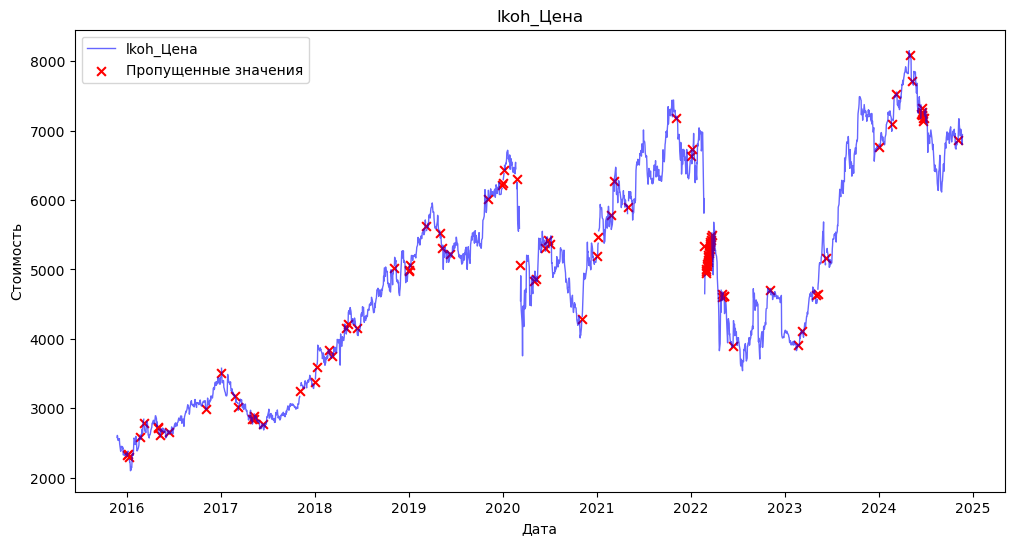

In [51]:
col = 'lkoh_–¶–µ–Ω–∞'

plt.figure(figsize=(12,6))
plt.plot(df[col], label=col, color='blue', alpha=0.6, linewidth=1)

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
nan_indices = df[col].isna()
plt.scatter(df.index[nan_indices], df[col].interpolate()[nan_indices], 
            marker='x', color='red', label='–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è', s=40)

plt.title(col)
plt.xlabel('–î–∞—Ç–∞')
plt.ylabel('–°—Ç–æ–∏–º–æ—Å—Ç—å')
plt.legend()
plt.show()

–ü–æ —Ä–æ—Å –∞–∫—Ü–∏—è–º —á—É—Ç—å –ø–æ–∑–∂–µ –Ω–∞—á–∞–ª–∞ 2020 –≥–æ–¥–∞ –∏ —á—É—Ç—å –ø–æ–∑–∂–µ –Ω–∞—á–∞–ª–∞ 2022 –∫–∞–∫–∞—è —Ç–æ –ª—é—Ç–∞—è –ø—Ä–æ–±–ª–µ–º–∞ —Å Nan - –æ—á –º–Ω–æ–≥–æ –∏–¥–µ—Ç –ø–æ–¥—Ä—è–¥ \
–ü–æ–∫–∞ —á—Ç–æ –∏–º–µ–µ—Ç —Å–º—ã—Å–ª –¥—Ä–æ–ø–Ω—É—Ç—å —è–Ω–¥–µ–∫—Å –∏ —Ä–æ—Å –≥–æ—Å –æ–±–ª–∏–≥–∞—Ü–∏–∏

In [53]:
drop_cols = ['ydex', 'bond3', 'bond5', 'bond1', 'ruble_to_doll', 'ruble_to_euro']
df = df.drop(columns=[col for col in df.columns if any(word in col for word in drop_cols)])

### –ò–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏—è

In [55]:
# df['lkoh_–¶–µ–Ω–∞'] = df['lkoh_–¶–µ–Ω–∞'].interpolate(method='linear') # –ò—Å–ø–æ–ª—å–∑—É–µ—Ç –¥–≤–µ —Å–æ—Å–µ–¥–Ω–∏–µ —Ç–æ—á–∫–∏
# df['lkoh_–¶–µ–Ω–∞'] = df['lkoh_–¶–µ–Ω–∞'].interpolate(method='spline', order=2) # –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –≤–µ—Å—å –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö
# df['lkoh_–¶–µ–Ω–∞'] = df['lkoh_–¶–µ–Ω–∞'].fillna(method='ffill') # –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—ã–¥—É—â–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º

In [56]:
df['lkoh_–¶–µ–Ω–∞'] = df['lkoh_–¶–µ–Ω–∞'].interpolate(method='linear') # –ò—Å–ø–æ–ª—å–∑—É–µ—Ç –¥–≤–µ —Å–æ—Å–µ–¥–Ω–∏–µ —Ç–æ—á–∫–∏

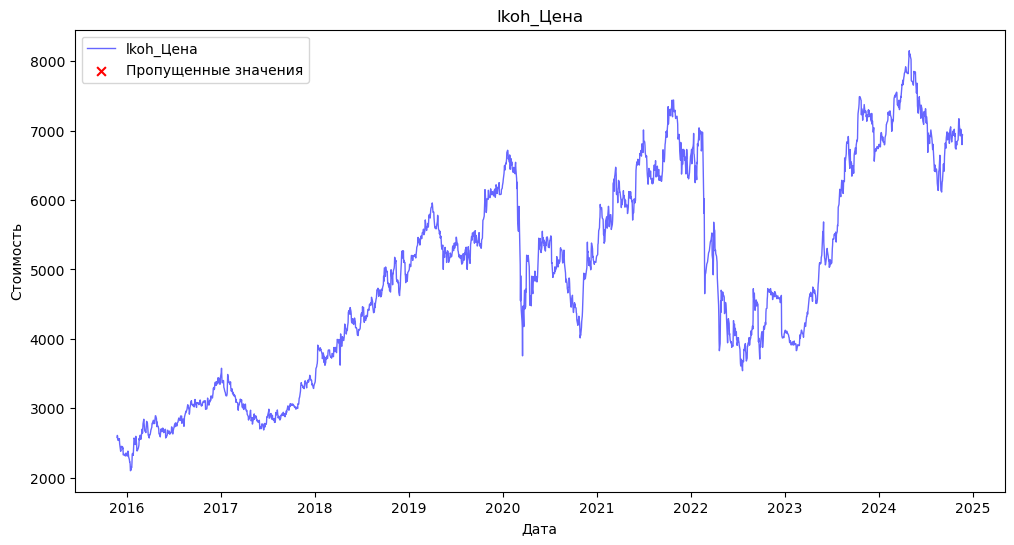

In [57]:
col = 'lkoh_–¶–µ–Ω–∞'

plt.figure(figsize=(12,6))
plt.plot(df[col], label=col, color='blue', alpha=0.6, linewidth=1)

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
nan_indices = df[col].isna()
plt.scatter(df.index[nan_indices], df[col].interpolate()[nan_indices], 
            marker='x', color='red', label='–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è', s=40)

plt.title(col)
plt.xlabel('–î–∞—Ç–∞')
plt.ylabel('–°—Ç–æ–∏–º–æ—Å—Ç—å')
plt.legend()
plt.show()

In [58]:
for i in df.columns:
    df[i] = df[i].interpolate(method='linear') # –ò—Å–ø–æ–ª—å–∑—É–µ—Ç –¥–≤–µ —Å–æ—Å–µ–¥–Ω–∏–µ —Ç–æ—á–∫–∏

### bfill

In [60]:
df.columns[df.isna().any()].tolist()

['inflation_and_key_rate_–ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞, % –≥–æ–¥–æ–≤—ã—Ö',
 'inflation_and_key_rate_–ò–Ω—Ñ–ª—è—Ü–∏—è, % –≥/–≥']

In [61]:
# df[['inflation_and_key_rate_–ò–Ω—Ñ–ª—è—Ü–∏—è, % –≥/–≥', 'inflation_and_key_rate_–ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞, % –≥–æ–¥–æ–≤—ã—Ö']]

In [62]:
# –ó–∞–ø–æ–ª–Ω—è—é –æ—Å—Ç–∞–≤—à–∏–µ—Å—è –∑–Ω–∞—á–µ–Ω–∏—è (–∏—Ö –±—ã–ª–æ 4) –ø—Ä–æ—Å—Ç–æ –º–µ—Ç–æ–¥–æ–º bfill
# –î–ª—è —ç—Ç–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø—Ä–æ—Å—Ç–æ —Å–∞–º–∞—è –ø–µ—Ä–≤–∞—è —Å—Ç—Ä–æ–∫–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ –±—ã–ª–∞ —Ç–æ–∂–µ NaN –∏ –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏—è –Ω–µ –ø–æ–º–æ–≥–ª–∞

for i in df.columns[df.isna().any()].tolist():
    df[i] = df[i].bfill() # –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—ã–¥—É—â–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º

In [63]:
# df[['inflation_and_key_rate_–ò–Ω—Ñ–ª—è—Ü–∏—è, % –≥/–≥', 'inflation_and_key_rate_–ö–ª—é—á–µ–≤–∞—è —Å—Ç–∞–≤–∫–∞, % –≥–æ–¥–æ–≤—ã—Ö']]

In [64]:
# print("–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞:")
# print(df.shape)
# print()
# missing_values_count = df.isna().sum()  # –û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
# missing_values_percentage = (df.isna().mean() * 100).round(2)  # –ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
# unique_values_count = df.nunique()  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∫–∞–∂–¥–æ–º —Å—Ç–æ–ª–±—Ü–µ

# missing_summary = pd.DataFrame({
#     'Missing Values Count': missing_values_count,
#     'Missing Values Percentage': missing_values_percentage,
#     'Unique Values Count': unique_values_count
# })

# print("–°–≤–æ–¥–∫–∞ –ø–æ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–º –∑–Ω–∞—á–µ–Ω–∏—è–º –∏ —É–Ω–∏–∫–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º:")
# missing_summary.sort_values('Missing Values Count', ascending=False)

## –†–µ–∞–ª–∏–∑–æ–≤–∞–Ω–Ω–∞—è –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç—å

In [66]:
# –≠—Ç–æ—Ç –∫–æ–¥ —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫—É—é –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—å –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–Ω–¥–µ–∫—Å–∞. 
# –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—å –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –≤–º–µ—Å—Ç–æ –ø—Ä–æ—Å—Ç–æ–π —Ä–∞–∑–Ω–∏—Ü—ã, —á—Ç–æ–±—ã —Å–¥–µ–ª–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –±–æ–ª–µ–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–º–∏ –∏ –æ–±–ª–µ–≥—á–∏—Ç—å –ø–æ—Å–ª–µ–¥—É—é—â–∏–µ —Ä–∞—Å—á–µ—Ç—ã.

df['imoex_ret'] = np.log(df['imoex_CLOSE'] / df['imoex_CLOSE'].shift(1))
df['moex_blue_chips_ret'] = np.log(df['moex_blue_chips_CLOSE'] / df['moex_blue_chips_CLOSE'].shift(1))
df['rtsi_ret'] = np.log(df['rtsi_CLOSE'] / df['rtsi_CLOSE'].shift(1))

# –í–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç—å —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –∫–∞–∫ –∫–≤–∞–¥—Ä–∞—Ç –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–∏. –≠—Ç–æ –æ—Å–Ω–æ–≤–∞–Ω–æ –Ω–∞ –∫–æ–Ω—Ü–µ–ø—Ü–∏–∏ Realized Volatility (RV), 
# –∫–æ—Ç–æ—Ä–∞—è —è–≤–ª—è–µ—Ç—Å—è –º–µ—Ä–æ–π –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–æ–π –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç–∏.

df['imoex_RV'] = df['imoex_ret']**2
df['moex_blue_chips_RV'] = df['moex_blue_chips_ret']**2
df['rtsi_RV'] = df['rtsi_ret']**2

# –°–∫–æ–ª—å–∑—è—â–∞—è —Å—É–º–º–∞ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è –∞–≥—Ä–µ–≥–∞—Ü–∏–∏ –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç–∏ –∑–∞ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–π –ø–µ—Ä–∏–æ–¥ (–≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ 5 –¥–Ω–µ–π). 
# –≠—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç —É—á–∏—Ç—ã–≤–∞—Ç—å –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫—É—é –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç—å –∑–∞ –Ω–µ–¥–µ–ª—é, —á—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø–æ–ª–µ–∑–Ω–æ –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –±—É–¥—É—â–µ–π –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç–∏.

df['imoex_RV_weekly'] = df['imoex_RV'].rolling(5).sum()
df['moex_blue_chips_RV_weekly'] = df['moex_blue_chips_RV'].rolling(5).sum()
df['rtsi_RV_weekly'] = df['rtsi_RV'].rolling(5).sum()

# –°–∫–æ–ª—å–∑—è—â–∞—è —Å—É–º–º–∞ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è –∞–≥—Ä–µ–≥–∞—Ü–∏–∏ –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç–∏ –∑–∞ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–π –ø–µ—Ä–∏–æ–¥ (–≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ 5 –¥–Ω–µ–π). 
# –≠—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç —É—á–∏—Ç—ã–≤–∞—Ç—å –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫—É—é –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç—å –∑–∞ –Ω–µ–¥–µ–ª—é, —á—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø–æ–ª–µ–∑–Ω–æ –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –±—É–¥—É—â–µ–π –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç–∏.

df['imoex_RV_target'] = df['imoex_RV_weekly'].shift(-5)
# df['moex_blue_chips_RV_target'] = df['moex_blue_chips_RV_weekly'].shift(-5)
# df['rtsi_RV_target'] = df['rtsi_RV_weekly'].shift(-5)

# —Ä–∞—Å–∫–æ–º–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å –µ—Å–ª–∏ –±—É–¥—É –ø—Ä–æ–≤–µ—Ä—è—Ç—å –Ω–∞ –¥—Ä—É–≥–æ–º –∏–Ω–¥–µ–∫—Å–µ 

In [67]:
# df = df.dropna(subset=['imoex_RV_target'])

In [68]:
df = df.dropna()

## Expanding Window Validation

In [70]:
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# from tqdm import tqdm

# def rolling_window_validation(df, test_size=10, window_size=1000, n_estimators_start=10, n_estimators_step=5):
#     assert test_size % 5 == 0, "test_size –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –∫—Ä–∞—Ç–µ–Ω 5"

#     train_size = len(df) - test_size
#     X = df.drop(['imoex_RV_target'], axis=1)
#     y = df['imoex_RV_target']

#     errors = []
#     model = RandomForestRegressor(n_estimators=n_estimators_start, random_state=42, warm_start=True, n_jobs=-1)

#     # –ò—Ç–µ—Ä–∞—Ç–∏–≤–Ω–æ–µ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ
#     for i in tqdm(range(window_size, train_size, 5), desc="–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏"):
#         X_train = X[i-window_size:i]
#         y_train = y[i-window_size:i]

#         X_test = X[i:i+5]
#         y_test = y[i:i+5]

#         if len(X_test) < 5:
#             break

#         # –£–≤–µ–ª–∏—á–∏–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–µ—Ä–µ–≤—å–µ–≤
#         model.n_estimators += n_estimators_step  
#         model.fit(X_train, y_train)

#         # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
#         y_pred = model.predict(X_test)

#         # –û—Ü–µ–Ω–∫–∞ –æ—à–∏–±–∫–∏
#         mse = mean_squared_error(y_test, y_pred)
#         errors.append(mse)

#     return errors

In [71]:
# errors = rolling_window_validation(df, test_size=10, window_size=1000, n_estimators_start=500, n_estimators_step=5)

In [72]:
# np.mean(errors)

## All Window Validation

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error  # –î–æ–±–∞–≤–ª—è–µ–º MAE
from tqdm import tqdm
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [75]:
def walk_forward_validation(df, test_size=5, n_estimators_start=750, n_estimators_step=20):  # –°—Ç–∞—Ä—Ç —Å 750
    assert test_size % 5 == 0, "test_size –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –∫—Ä–∞—Ç–µ–Ω 5"

    train_size = len(df) - test_size
    X = df.drop(['imoex_RV_target'], axis=1)
    y = df['imoex_RV_target']

    initial_train_size = int(train_size * 0.9)
    X_train = X[:initial_train_size]
    y_train = y[:initial_train_size]

    mse_errors = []  # –ü–µ—Ä–µ–∏–º–µ–Ω–æ–≤—ã–≤–∞–µ–º errors
    mae_errors = []  # –ù–æ–≤—ã–π –º–∞—Å—Å–∏–≤ –¥–ª—è MAE
    model = RandomForestRegressor(n_estimators=n_estimators_start, random_state=42, 
                                warm_start=True, n_jobs=-1)

    for i in tqdm(range(initial_train_size, train_size, 5), desc="–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏"):
        X_test = X[i:i+5]
        y_test = y[i:i+5]

        if len(X_test) < 5:
            break

        model.n_estimators += n_estimators_step
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        # –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º –æ–±–µ –æ—à–∏–±–∫–∏
        mse_errors.append(mean_squared_error(y_test, y_pred))
        mae_errors.append(mean_absolute_error(y_test, y_pred))  # –î–æ–±–∞–≤–ª—è–µ–º MAE

        X_train = pd.concat([X_train, X_test])
        y_train = pd.concat([y_train, y_test])

    return mse_errors, mae_errors  # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –æ–±–∞ –º–∞—Å—Å–∏–≤–∞


In [76]:
# mse_scores, mae_scores = walk_forward_validation(df, test_size=5, n_estimators_start=750, n_estimators_step=20)
# print(f"–°—Ä–µ–¥–Ω–∏–π RMSE: {np.sqrt(np.mean(mse_scores))}")
# print(f"–°—Ä–µ–¥–Ω–∏–π MAE: {np.mean(mae_scores)}")

In [77]:
# plt.plot(np.sqrt(mse_scores), label='MSE')
# plt.plot(mae_scores, label='MAE')
# plt.legend()
# plt.title('–î–∏–Ω–∞–º–∏–∫–∞ –æ—à–∏–±–æ–∫ –Ω–∞ –ø—Ä–æ–≥–Ω–æ–∑–Ω–æ–º –≥–æ—Ä–∏–∑–æ–Ω—Ç–µ')
# ;

In [78]:
np.mean(df['imoex_RV_target'])

0.000979755632737716

In [79]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import numpy as np

# # –†–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–∞ = 5
# test_size = 5
# train_size = len(df) - test_size

# # –†–∞–∑–¥–µ–ª—è–µ–º –¥–∞–Ω–Ω—ã–µ
# X = df.drop(['imoex_RV_target'], axis=1)
# y = df['imoex_RV_target']

# X_train_full = X[:train_size]
# y_train_full = y[:train_size]

# X_final_test = X[train_size:]
# y_final_test = y[train_size:]

# # –í—ã—á–∏—Å–ª—è–µ–º, —Å–∫–æ–ª—å–∫–æ —à–∞–≥–æ–≤ –±—ã–ª–æ –±—ã —Å–¥–µ–ª–∞–Ω–æ –≤ walk-forward
# steps = (train_size - int(train_size * 0.9)) // 5
# final_estimators = 700 + 20 * steps  # —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º –∏–∑ –≤—ã–∑–æ–≤–∞

# # –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ –≤—Å–µ—Ö —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
# final_model = RandomForestRegressor(
#     n_estimators=final_estimators,
#     random_state=42,
#     n_jobs=-1
# )
# final_model.fit(X_train_full, y_train_full)

# # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –º–µ—Ç—Ä–∏–∫–∏
# final_preds = final_model.predict(X_final_test)
# final_mse = mean_squared_error(y_final_test, final_preds)
# final_mae = mean_absolute_error(y_final_test, final_preds)

# print(f"\nüìå –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–∏—Ö 5 —Å—Ç—Ä–æ–∫–∞—Ö: {final_preds}")
# print(f"üìâ RMSE –Ω–∞ —Ñ–∏–Ω–∞–ª—å–Ω–æ–º —Ç–µ—Å—Ç–µ: {np.sqrt(final_mse)}")
# print(f"üìâ MAE –Ω–∞ —Ñ–∏–Ω–∞–ª—å–Ω–æ–º —Ç–µ—Å—Ç–µ: {final_mae}")


## –î–æ–±–∞–≤–ª–µ–Ω–∏–µ —Ñ–∏—á–µ–π

1) RV(t-22)
2) –î–æ–±–∞–≤–ª–µ–Ω–∏–µ LV(1), LV(3), LV(6) - –±–∏–Ω–∞—Ä–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –≥–¥–µ 1 —ç—Ç–æ —Ü–µ–Ω–∞ –∞–∫—Ü–∏–∏ –Ω–∏–∂–µ —á–µ–º –±—ã–ª–∞ 1, 3, 6, –º–µ—Å—è—Ü–µ–≤ –Ω–∞–∑–∞–¥
3) –¥–æ–±–∞–≤–∏—Ç—å CSAD

**RV(t-22)**

In [83]:
df['imoex_RV_monthly'] = df['imoex_RV'].rolling(22).sum()
df['moex_blue_chips_RV_monthly'] = df['moex_blue_chips_RV'].rolling(22).sum()
df['rtsi_RV_monthly'] = df['rtsi_RV'].rolling(22).sum()

**LV(1) LV(3) LV(6)**

In [85]:
mass = ['brent_–¶–µ–Ω–∞', 'gold_–¶–µ–Ω–∞', 'svoe_–¶–µ–Ω–∞', 'gazp_–¶–µ–Ω–∞', 'lkoh_–¶–µ–Ω–∞', 'plzl_–¶–µ–Ω–∞',
'sber_–¶–µ–Ω–∞', 'sngs_–¶–µ–Ω–∞', 'tath_–¶–µ–Ω–∞', 'imoex_CLOSE', 'moex_blue_chips_CLOSE',
'rtsi_CLOSE']

In [86]:
for col in mass:
    new_col_name = f'LV_{col.split("_")[0]}_one_month'
    df[new_col_name] = np.where(df[col] < df[col].shift(22), 1, 0)

for col in mass:
    new_col_name = f'LV_{col.split("_")[0]}_three_month'
    df[new_col_name] = np.where(df[col] < df[col].shift(66), 1, 0)

for col in mass:
    new_col_name = f'LV_{col.split("_")[0]}_six_month'
    df[new_col_name] = np.where(df[col] < df[col].shift(132), 1, 0)

C:\Users\MadBoss\AppData\Local\Temp\ipykernel_15144\3573950744.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = np.where(df[col] < df[col].shift(132), 1, 0)
C:\Users\MadBoss\AppData\Local\Temp\ipykernel_15144\3573950744.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = np.where(df[col] < df[col].shift(132), 1, 0)
C:\Users\MadBoss\AppData\Local\Temp\ipykernel_15144\3573950744.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert

**CSAD**

In [88]:
def calculate_csad(df, stocks):
    # –°–æ–∑–¥–∞–π—Ç–µ –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã –¥–ª—è –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∏—Ö –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–µ–π
    for stock in stocks:
        df[f'{stock}_ret'] = np.log(df[stock] / df[stock].shift(1))

    # –†–∞—Å—Å—á–∏—Ç–∞–π—Ç–µ —Å—Ä–µ–¥–Ω–µ—Ä—ã–Ω–æ—á–Ω—É—é –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—å
    df['market_return'] = df[[f'{stock}_ret' for stock in stocks]].mean(axis=1)

    # –†–∞—Å—Å—á–∏—Ç–∞–π—Ç–µ –∞–±—Å–æ–ª—é—Ç–Ω—ã–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –æ—Ç —Å—Ä–µ–¥–Ω–µ—Ä—ã–Ω–æ—á–Ω–æ–π –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–∏
    for stock in stocks:
        df[f'{stock}_abs_dev'] = np.abs(df[f'{stock}_ret'] - df['market_return'])

    # –†–∞—Å—Å—á–∏—Ç–∞–π—Ç–µ CSAD
    df['csad'] = df[[f'{stock}_abs_dev' for stock in stocks]].mean(axis=1)

    # –£–¥–∞–ª–∏—Ç–µ –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã
    df.drop([f'{stock}_ret' for stock in stocks] + [f'{stock}_abs_dev' for stock in stocks] + ['market_return'], axis=1, inplace=True)

    return df

In [89]:
stocks = ['brent_–¶–µ–Ω–∞', 'gold_–¶–µ–Ω–∞', 'svoe_–¶–µ–Ω–∞', 'gazp_–¶–µ–Ω–∞', 'lkoh_–¶–µ–Ω–∞', 'plzl_–¶–µ–Ω–∞',
          'sber_–¶–µ–Ω–∞', 'sngs_–¶–µ–Ω–∞', 'tath_–¶–µ–Ω–∞']

df = calculate_csad(df, stocks)

C:\Users\MadBoss\AppData\Local\Temp\ipykernel_15144\1657683320.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{stock}_ret'] = np.log(df[stock] / df[stock].shift(1))
C:\Users\MadBoss\AppData\Local\Temp\ipykernel_15144\1657683320.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{stock}_ret'] = np.log(df[stock] / df[stock].shift(1))
C:\Users\MadBoss\AppData\Local\Temp\ipykernel_15144\1657683320.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

In [90]:
df = df.dropna()

In [91]:
mse_scores, mae_scores = walk_forward_validation(df, test_size=5, n_estimators_start=1000, n_estimators_step=20)
print(f"–°—Ä–µ–¥–Ω–∏–π RMSE: {np.sqrt(np.mean(mse_scores))}")
print(f"–°—Ä–µ–¥–Ω–∏–π MAE: {np.mean(mae_scores)}")

–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 46/46 [00:56<00:00,  1.23s/it]

–°—Ä–µ–¥–Ω–∏–π RMSE: 0.0032313374629312553
–°—Ä–µ–¥–Ω–∏–π MAE: 0.0016619089696079726


**–ü–æ—á–µ–º—É —Ç–æ –¥–æ–ø —Ñ–∏—á–∏ —Ç–æ–ª—å–∫–æ —É—Ö—É–¥—à–∏–ª–∏ —Å–∏—Ç—É–∞—Ü–∏—é**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# –†–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–∞ = 5
test_size = 5
train_size = len(df) - test_size

# –†–∞–∑–¥–µ–ª—è–µ–º –¥–∞–Ω–Ω—ã–µ
X = df.drop(['imoex_RV_target'], axis=1)
y = df['imoex_RV_target']

X_train_full = X[:train_size]
y_train_full = y[:train_size]

X_final_test = X[train_size:]
y_final_test = y[train_size:]

# –í—ã—á–∏—Å–ª—è–µ–º, —Å–∫–æ–ª—å–∫–æ —à–∞–≥–æ–≤ –±—ã–ª–æ –±—ã —Å–¥–µ–ª–∞–Ω–æ –≤ walk-forward
steps = (train_size - int(train_size * 0.9)) // 5
final_estimators = 700 + 20 * steps  # —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º –∏–∑ –≤—ã–∑–æ–≤–∞

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ –≤—Å–µ—Ö —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
final_model = RandomForestRegressor(
    n_estimators=final_estimators,
    random_state=42,
    n_jobs=-1
)
final_model.fit(X_train_full, y_train_full)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –º–µ—Ç—Ä–∏–∫–∏
final_preds = final_model.predict(X_final_test)
final_mse = mean_squared_error(y_final_test, final_preds)
final_mae = mean_absolute_error(y_final_test, final_preds)

print(f"\nüìå –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–∏—Ö 5 —Å—Ç—Ä–æ–∫–∞—Ö: {final_preds}")
print(f"üìâ RMSE –Ω–∞ —Ñ–∏–Ω–∞–ª—å–Ω–æ–º —Ç–µ—Å—Ç–µ: {np.sqrt(final_mse)}")
print(f"üìâ MAE –Ω–∞ —Ñ–∏–Ω–∞–ª—å–Ω–æ–º —Ç–µ—Å—Ç–µ: {final_mae}")


## CatBoost

In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm
import pandas as pd

def walk_forward_validation_catboost(df, test_size=10, n_estimators_start=500, n_estimators_step=5):
    assert test_size % 5 == 0, "test_size –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –∫—Ä–∞—Ç–µ–Ω 5"

    train_size = len(df) - test_size
    X = df.drop(['imoex_RV_target'], axis=1)
    y = df['imoex_RV_target']

    initial_train_size = int(train_size * 0.9)
    X_train = X[:initial_train_size]
    y_train = y[:initial_train_size]

    mse_errors = []
    mae_errors = []

    current_estimators = n_estimators_start

    for i in tqdm(range(initial_train_size, train_size, 5), desc="–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ (CatBoost)"):
        X_test = X[i:i+5]
        y_test = y[i:i+5]

        if len(X_test) < 5:
            break

        train_pool = Pool(X_train, y_train)
        test_pool = Pool(X_test)

        model = CatBoostRegressor(
            iterations=current_estimators,
            learning_rate=0.05,
            depth=6,
            verbose=False,
            random_seed=42
        )
        model.fit(train_pool)

        y_pred = model.predict(test_pool)

        mse_errors.append(mean_squared_error(y_test, y_pred))
        mae_errors.append(mean_absolute_error(y_test, y_pred))

        X_train = pd.concat([X_train, X_test])
        y_train = pd.concat([y_train, y_test])
        current_estimators += n_estimators_step

    return mse_errors, mae_errors


In [ ]:
mse_scores, mae_scores = walk_forward_validation_catboost(df, test_size=5, n_estimators_start=750, n_estimators_step=10)
print(f"–°—Ä–µ–¥–Ω–∏–π RMSE: {np.sqrt(np.mean(mse_scores))}")
print(f"–°—Ä–µ–¥–Ω–∏–π MAE: {np.mean(mae_scores)}")

In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# –†–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–∞ = 5
test_size = 5
train_size = len(df) - test_size

# –î–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ
X = df.drop(['imoex_RV_target'], axis=1)
y = df['imoex_RV_target']

X_train_full = X[:train_size]
y_train_full = y[:train_size]

X_final_test = X[train_size:]
y_final_test = y[train_size:]

# –í—ã—á–∏—Å–ª—è–µ–º, —Å–∫–æ–ª—å–∫–æ —à–∞–≥–æ–≤ –±—ã–ª–æ –±—ã —Å–¥–µ–ª–∞–Ω–æ –≤ walk-forward
steps = (train_size - int(train_size * 0.9)) // 5
final_estimators = 100 + 10 * steps  # —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º –∏–∑ –≤—ã–∑–æ–≤–∞ CatBoost

# –°–æ–∑–¥–∞—ë–º –ø—É–ª –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
train_pool = Pool(X_train_full, y_train_full)
test_pool = Pool(X_final_test)

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å
final_model = CatBoostRegressor(
    iterations=final_estimators,
    learning_rate=0.05,
    depth=6,
    verbose=False,
    random_seed=42
)
final_model.fit(train_pool)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –º–µ—Ç—Ä–∏–∫–∏
final_preds = final_model.predict(test_pool)
final_mse = mean_squared_error(y_final_test, final_preds)
final_mae = mean_absolute_error(y_final_test, final_preds)

# –í—ã–≤–æ–¥
print(f"\nüìå –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–∏—Ö 5 —Å—Ç—Ä–æ–∫–∞—Ö: {final_preds}")
print(f"üìâ RMSE –Ω–∞ —Ñ–∏–Ω–∞–ª—å–Ω–æ–º —Ç–µ—Å—Ç–µ: {np.sqrt(final_mse)}")
print(f"üìâ MAE –Ω–∞ —Ñ–∏–Ω–∞–ª—å–Ω–æ–º —Ç–µ—Å—Ç–µ: {final_mae}")


–ß—Ç–æ –¥–∞–ª—å—à–µ?
1) –ú–Ω–µ –Ω—É–∂–Ω–æ –¥–æ–±–∞–≤–∏—Ç—å –≤—Å—è–∫–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –∏–∑ MIDAS —Å—Ç–∞—Ç—å–∏
4) –¥–æ–±–∞–≤–∏—Ç—å —Å–∫–æ–ª—å–∑—è—â–∏–µ –æ–∫–Ω–∞ –ø–æ –∏–Ω–¥–µ–∫—Å–∞–º –∏ –º–± –µ—â–µ –ø–æ —á–µ–º—É —Ç–æ
6) –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å PCA –∏ SNS –¥–ª—è –æ—Ç–±–æ—Ä–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
8) –º–æ–¥–µ–ª–∏ HAR –∏ GARCHt
9) –Ω–∞–¥–æ –ø–∏—Å–∞—Ç—å –ø–∞—Ä—Å–µ—Ä—ã

## –ü–∞—Ä—Å–µ—Ä –∫ investing.com

In [ ]:
# !pip install selenium

In [ ]:
# from selenium import webdriver
# from selenium.webdriver.chrome.options import Options
# import time

# chrome_options = Options()
# # chrome_options.add_argument("--headless")  # –ú–æ–∂–µ—à—å –≤—Ä–µ–º–µ–Ω–Ω–æ –æ—Ç–∫–ª—é—á–∏—Ç—å headless –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏
# chrome_options.add_argument("--disable-gpu")
# chrome_options.add_argument("--no-sandbox")
# chrome_options.add_argument(
#     "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
# )


# driver = webdriver.Chrome(options=chrome_options)
# driver.get("https://ru.investing.com/equities/sberbank_rts-historical-data")

# # –ü–æ–¥–æ–∂–¥—ë–º —á—É—Ç—å –±–æ–ª—å—à–µ (–≤–¥—Ä—É–≥ –≤—Å—ë –∂–µ –≥—Ä—É–∑–∏—Ç—Å—è)
# time.sleep(5)

# # –ü–µ—á–∞—Ç–∞–µ–º –ø–µ—Ä–≤—ã–µ 500 —Å–∏–º–≤–æ–ª–æ–≤ HTML
# print(driver.page_source[:500])

# driver.quit()


## –≠–∫–æ–Ω–æ–º–µ—Ç—Ä–∏–∫–∞ - —Ç–µ—Å—Ç—ã

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf, pacf
from scipy.stats import shapiro

result = adfuller(df['imoex_RV_target'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


In [ ]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤
residuals = df['imoex_RV_target'] - df['imoex_RV_target'].mean()
stat, p = shapiro(residuals)
print('Shapiro-Wilk Statistic:', stat)
print('p-value:', p)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.acorr(df['imoex_RV_target'], maxlags=20)
plt.title('ACF')
plt.subplot(2,1,2)
plt.acorr(df['imoex_RV_target'], maxlags=20)
plt.title('PACF')
plt.tight_layout()
plt.show()